In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
%matplotlib inline

# Todos los puntos

In [6]:
#Función de correlación Landy-Szalay
def estim_LS(NDD, NRR, NDR):
    return (NDD - 2*NDR + NRR)/NRR
#Función de correlación de Hamilton
def estim_HAM(NDD, NRR, NDR):
    return (NDD*NRR/NDR**2) - 1

In [22]:
def imag(x,y,t,cmap):
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap)
    cax=plt.colorbar()
    plt.contour(x,10,cmap=plt.cm.gray,linewidths=0.5)
    plt.ylabel('$r_{\pi}$',fontsize = 16)
    plt.xlabel('$r_{p}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

## Isotropia

In [5]:
DD = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/BF_outs/all_puntos/DD_isofull.dat', sep = ' ', header=None)
RR = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/BF_outs/all_puntos/RR_isofull.dat', sep = ' ', header=None)
DR = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/BF_outs/all_puntos/DR_isofull.dat', sep = ' ', header=None)

DD = np.array(DD)
RR = np.array(RR)
DR = np.array(DR)

In [11]:
eps_LS = estim_LS(DD, RR, DR)
eps_HAM = estim_HAM(DD, RR, DR)

r = np.linspace(0,len(eps_LS),len(eps_LS))

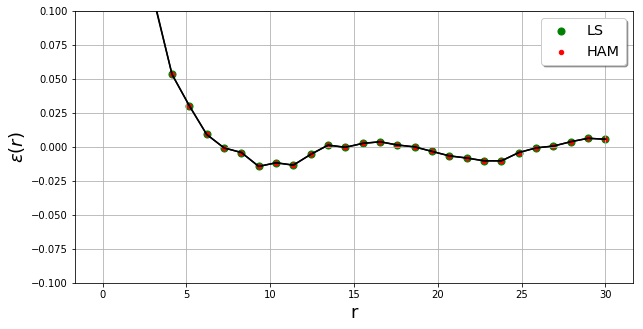

In [19]:
fig = plt.figure(figsize=(10,5))
plt.scatter(r,eps_LS, s=50, c='g',label='LS')
plt.scatter(r,eps_HAM, s=20, c='r',label='HAM')
plt.plot(r,eps_LS,'k-')
plt.plot(r,eps_HAM,'k-')
plt.ylim(-0.1,0.1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

# Anisotropia

In [20]:
DD = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/BF_outs/all_puntos/DD_anifull.dat', sep = ' ', header=None)
RR = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/BF_outs/all_puntos/RR_anifull.dat', sep = ' ', header=None)
DR = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/BF_outs/all_puntos/DR_anifull.dat', sep = ' ', header=None)

DD = np.array(DD)
RR = np.array(RR)
DR = np.array(DR)

In [21]:
eps_LS = estim_LS(DD, RR, DR)
eps_HAM = estim_HAM(DD, RR, DR)

In [25]:
top = np.max(eps_LS[np.where(eps_LS < 0.05)])
down = np.min(eps_LS[np.where(eps_LS > -0.05)])
eps_LS[np.where(eps_LS > 0.05)] = top
eps_LS[np.where(eps_LS < -0.05)] = down

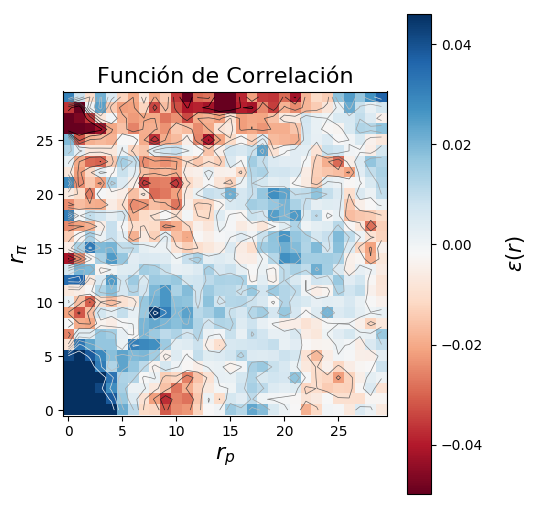

In [26]:
imag(eps_LS,'Función de Correlación','$\epsilon(r)$',cmap='RdBu')

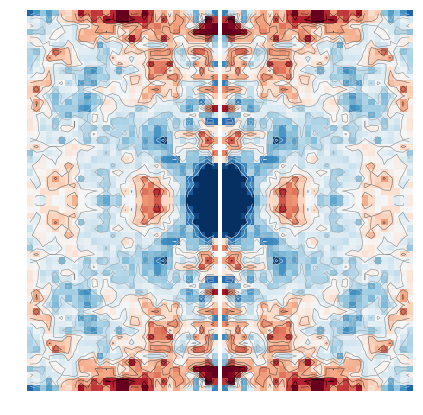

In [27]:
import scipy.misc
from scipy import ndimage
import matplotlib.gridspec as gridspec

plt.figure(figsize = (7,7))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(eps_LS), 90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(eps_LS.T,90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(eps_LS.T,-90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(eps_LS, 0)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
plt.show()